# SKLearn Tutorial
The following notebook follows a tutorial on applied data analysis in python as an introduction to machine learning usage of sklearn. https://milliams.gitlab.io/applied_data_analysis/

## Fitting Data - Linear Regression Example
A basic example of a machine learning which performs linear regression. Data must be proccessed correctly to become useful to a machine learning model.

### Dataset
The dataset for this example can be found at https://milliams.com/courses/applied_data_analysis/linear.csv, a csv file can be read in using pandas using `pandas.read_csv()`

In [1]:
from pandas import read_csv

data = read_csv("https://milliams.com/courses/applied_data_analysis/linear.csv")

As `data` is a pandas object, we can view it using `.head()` and look at other properties it has with other methods.

In [2]:
data.head()

,x,y
0,3.745401,3.229269
1,9.507143,14.185654
2,7.319939,9.524231
3,5.986585,6.672066
4,1.560186,-3.358149


In [3]:
data.count()

x    50
y    50
dtype: int64

There are 50 examples in this dataset. Matplotlib can be used to display this data on a graph:

<AxesSubplot:xlabel='x', ylabel='y'>

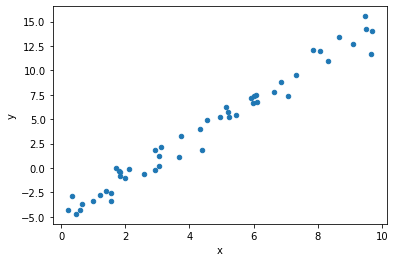

In [4]:
%matplotlib inline
data.plot.scatter("x", "y")

The graph clearly shows that this problem can be solved with a linear formula. The linear relationship between the y and x values will be found using linear regression.
Using sklearn, we shall use `sklearn.linear_model.LinearRegression` to build a model.

### Set Up
Model import, and instance `model` is created of the linear regression model.

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

`fit_inttercept` is a hyperparameter which by default, causes the model to fit to the y-intercept. Setting `fit_intercept` to `True` will prevent this from happening. Try running it with `False` to see what happens.

### Fitting the data to the model
the `fit()` method fits data to the previously created model. `fit()` takes two aguments:
* The input data as a two dimentional array with samples and features
* The labels of the data as a one dimentional array

If this is confusing, read https://milliams.gitlab.io/applied_data_analysis/aside_one_two_dimensional.html



In [6]:
model.fit(data[["x"]], data["y"])

LinearRegression()

### Plotting the model
`fit()` has created a model to best predict new data based on the training data. To visualise this, matplotlib will be used along with pandas DataFrame to plot the training data on a graph along with a reperesentation of the linear model created.

As the model is linear, two prediction values can be taken from the model and can be used to plot a line on the graph reperesenting the model. Usually the two predictions used are that of the minimum and maximum X values.

`predict()` is a function that can be called from the model instance to output prediction labels for any input data. `predict()` takes in examples structured in the same way as the input data is inputted into `fit()`, therefore all of the x values are put into a `DataFrame` before passing them to `predict()`

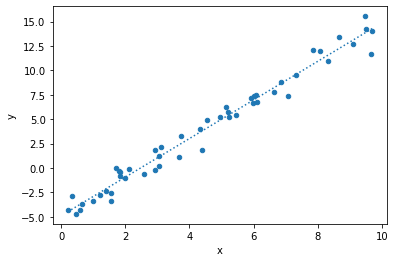

In [7]:
import matplotlib.pyplot as plt
from pandas import DataFrame

#DataFrame created with the minimum and maximum x values in the dataset
x_fit = DataFrame([data["x"].min(), data["x"].max()])

#Labels are predicted from data in the DataFrame
y_pred = model.predict(x_fit)

#Matplotlib is used to plot a scatter graph of the training data
fig, ax = plt.subplots()
data.plot.scatter("x", "y", ax=ax)

#A line reperesenting the model is plotted using the x_fit DataFrame and the corrisponding predicted y values.
ax.plot(x_fit[0], y_pred, linestyle=":")

Other important values can be extracted from the model, including the gradient of the model and the y-intercept. These can be used to create the linear formula of the model.

`.coef_[x]` with `x` being a particular feature (point on the line) returns the gradient. `.intercept_` returns the models y-intercept.

In [8]:
model.coef_[0]

1.9776566003853107

In [9]:
model.intercept_

-4.903310725531115

The model can therefore be reperesented as:

y=1.97x-4.90

## Testing
To avoid overfitting, testing needs to be done on a seperate test set. Using the training set to perform testing with will cause overfitting.

SKLearn contains a function `train_test_split` to split data into a training and testing set.

Using `data` from the last excersise, `train` and `test` will be created using this method.

`train_test_split` will randomly split up the data, but the parameter `random_state` allows for a reproducible split, if the data is required to be split randomly in the same way twice.

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42)

The random distribution of `train` and `test` can be seen in the following plot:

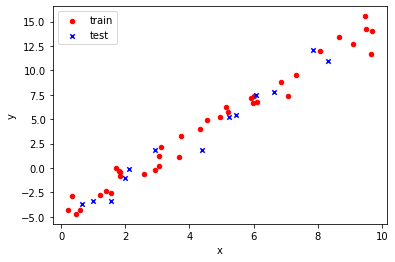

In [11]:
fig2, ax = plt.subplots()

train.plot.scatter("x", "y", color="red", marker="o", ax=ax, label="train")
test.plot.scatter("x", "y", color="blue", marker="x", ax=ax, label="test")
ax.legend()

`train` can now be passed to the `fit()` function to create a second model:

In [12]:
train_test_model = LinearRegression(fit_intercept=True)

train_test_model.fit(train[['x']], train['y'])

LinearRegression()

The model compared to the first model created can be tested using the test data set to see how good the model is. This cannot be done with the first model because of the absence of a test set means the model has no unseen data to judge its performamce on.

The green points plotted reperesent predictions of the test data, and the green lines show the variance of the actual test data from the predictions.

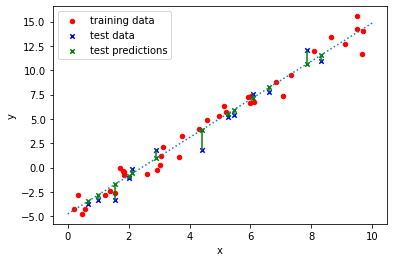

In [13]:
#DataFrame created with the minimum and maximum x values in the dataset
x_plot = DataFrame([0, 10])

#Labels are predicted from data in the DataFrame
y_plot = train_test_model.predict(x_plot)

pred = DataFrame(test['x'])
pred.reset_index(drop=True, inplace=True)

y_pred = DataFrame(train_test_model.predict(pred), columns=["y"])

pred['y'] = y_pred['y']


#Matplotlib is used to plot a scatter graph of the training data
fig3, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['figure.dpi'] = 100
train.plot.scatter("x", "y", color="red", marker="o", ax=ax, label="training data")
test.plot.scatter("x", "y", color="blue", marker="x", ax=ax, label="test data")

pred.plot.scatter('x', "y", color="green", marker="x", ax=ax, label="test predictions")


test.reset_index(drop=True, inplace=True)


for index in range(0,len(test)):
    
    x_values = [test.iloc[index]['x'], pred.iloc[index]['x']]
    y_values = [test.iloc[index]['y'], pred.iloc[index]['y']]    
    ax.plot(x_values, y_values, color='green')

#A line reperesenting the model is plotted using the x_fit DataFrame and the corrisponding predicted y values.
ax.plot(x_plot[0], y_plot, linestyle=":")

Below is the gradient of the model:

In [14]:
train_test_model.coef_[0]

1.960188306842561

Below is the y intercept of the model:

In [15]:
train_test_model.intercept_

-4.752522960211895

### Corrilation In Python
Corrilation in machine learning is about how related different features are, if the value of one feature affects another. Linear corrilation is usually measured to discover corrilation between features. Using numpy to create some synthetic data arrays, below are two example sets of corrilated data:

In [16]:
import numpy as np
a = np.arange(100)
b = np.arange(100) * 2
df = DataFrame({"a": a, "b": b})
df.head()

,a,b
0,0,0
1,1,2
2,2,4
3,3,6
4,4,8


pandas `DataFrame` has a `describe()` method which provides information about the data:

In [17]:
df.describe()

,a,b
count,100.000000,100.000000
mean,49.500000,99.000000
std,29.011492,58.022984
min,0.000000,0.000000
25%,24.750000,49.500000
50%,49.500000,99.000000
75%,74.250000,148.500000
max,99.000000,198.000000


To get the corrilation between column `a` and `b`, the `corr()` method can be used from the `DataFrame`.

In [18]:
df.corr()

,a,b
a,1.0,1.0
b,1.0,1.0


The outputted table shows the corilation between each column. Between `a` and `a` along with `b` and `b`, both will always have a value of 1, as they are comparing corrilation aginst themselves. Where `a` is being compared to `b`, and `b` is being compared to `a`, shows the corrilation between the two colums, which as the colums are directly proportional, shows a corrilation of 1.

Below shows an example when `a` and `b` are inversly corrilated:

In [19]:
a = np.arange(100) 
b = np.arange(100) * -2
df = DataFrame({"a": a, "b": b})
df.corr()

,a,b
a,1.0,-1.0
b,-1.0,1.0


#### Multiple cross corrilation
Sometimes there are more than two features that need to be compared. Here is an example using a real dataset from sklearn:

In [20]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()
housing = DataFrame(housing_data.data, columns = housing_data.feature_names)

housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Now lets see the result of `corr()`:

In [21]:
housing.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


The corrilation array can be stored in another `DataFrame` and specific values can be viewed. Lets see the corrilation between `AveRooms` and `Population`:

In [22]:
corr = housing.corr()
corr['AveRooms']['Population']

-0.07221284865893271

A Python Algorithm can be used to search through the `corr` table to discover the minimum and maximum corrilation between two features:

In [23]:
#Minimum Colunm
corr.min().idxmin()

'Latitude'

In [24]:
#Minimum Value
corr.min().min()

-0.9246644339150366

In [25]:
#Replace 1.00 values
corr_edit = corr.replace(to_replace=1.00, value=np.nan)
#Max Colunm
corr_edit.max().idxmax()

'AveRooms'

In [26]:
#Max Value
corr_edit.max().max()

0.8476213257130424

Now the data is quite useful to be seen as values in a table, but the data would be interpreted easier if it was displayed in a better way:

<AxesSubplot:>

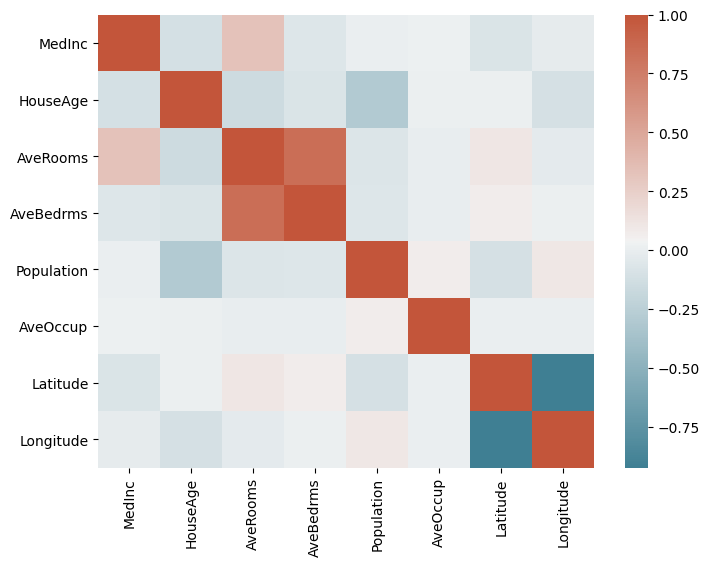

In [28]:
import seaborn as sns

#colour sceme https://seaborn.pydata.org/tutorial/color_palettes.html
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap)

Corrilation is reperesented by the scale on the right. It is easy to see the positive corrilation between  `AveBedrms` and `AveRooms`. There is also a strong negative corrilation between `Longitude` and `Latitude`.

#### Multi-variable scatter matrix
pandas has a `scatter_matric` function which shows graphs for each feature pairing. These graphs are simply plots of the features against eachother, and can be used to visulise corrilation. A linear relationship between features can be seen as a result of corilation. The `scatter_matrix` is called on the dataset.

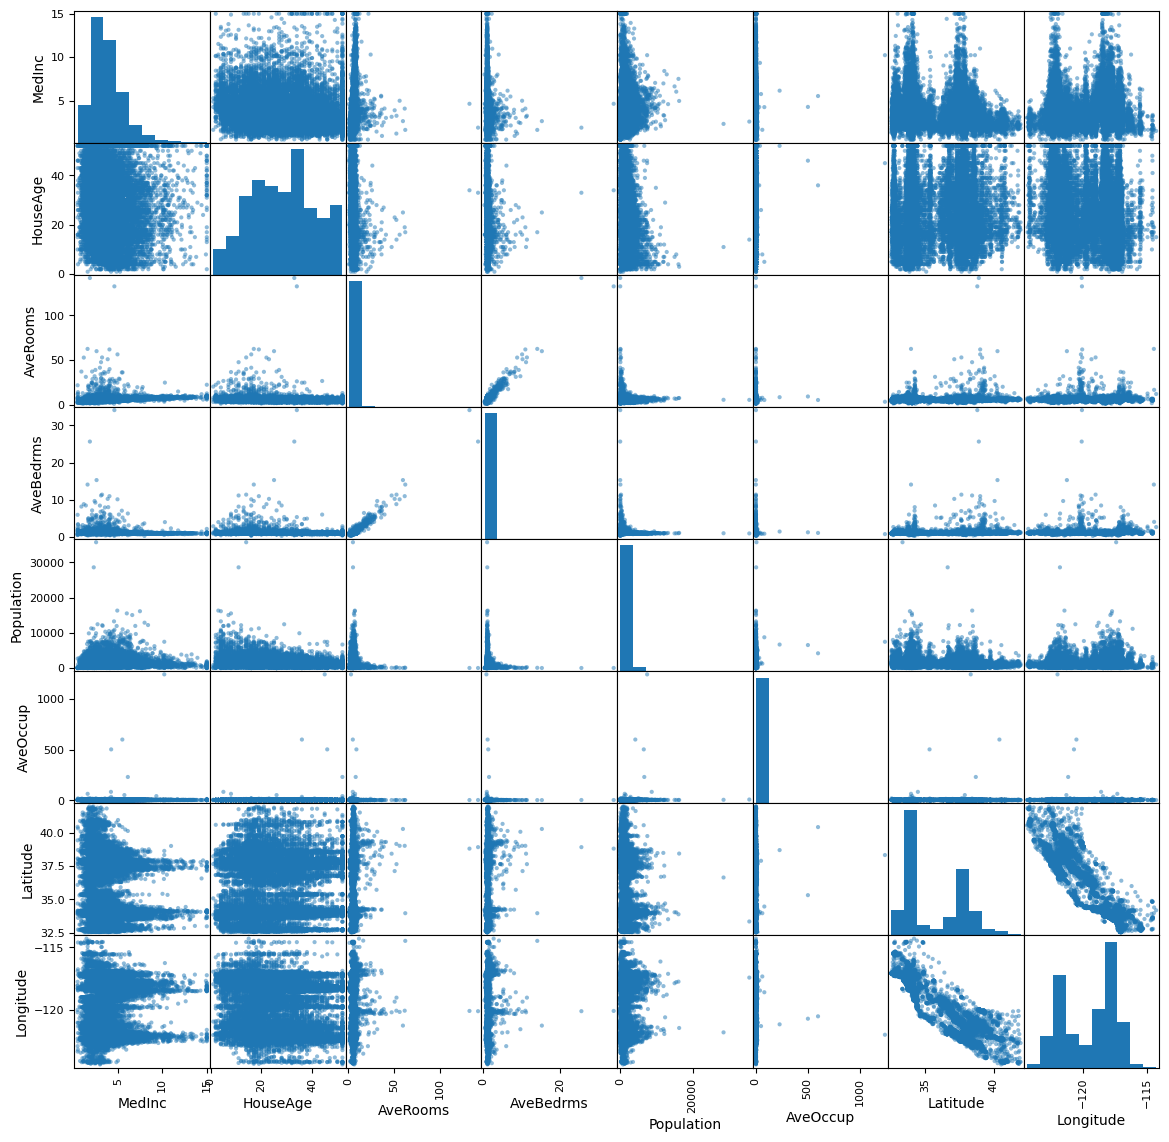

In [31]:
from pandas.plotting import scatter_matrix

a = scatter_matrix(housing, figsize=(14, 14))